In [1]:
import numpy as np
import os
os.environ["KERAS_BACKEND"] = "torch"
import keras_core as keras
import pandas as pd
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

Using PyTorch backend.


### Load Data

In [2]:
train_data = pd.read_csv("mnist_train.zip")
train_data

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = train_data.iloc[:,1:].to_numpy()
Y = train_data.iloc[:,0].to_numpy()

In [4]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
Y

array([0, 4, 1, ..., 5, 6, 8])

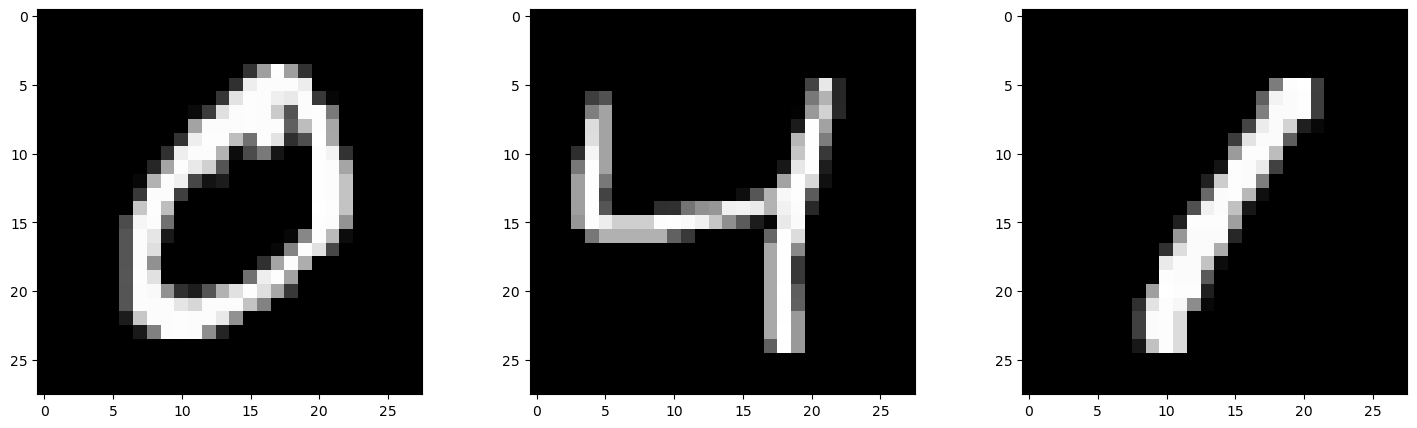

In [7]:
plt.figure(figsize=(18, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.axis(True)
    plt.imshow(np.reshape(X[i], (28, 28)), cmap='gray')
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

### Data Preprocessing

In [8]:
## Normalize X_data
X_train = X.astype("float32") / 255
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
## One-Hot Encoding
Y_train = keras.utils.to_categorical(Y_train)
Y_train

array([[[1., 0.],
        [1., 0.],
        [0., 1.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       ...,

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]])

: 

## **Dataset Splitting**

The dataset is divided into three subsets to facilitate efficient model training and evaluation:

- **Training Set (70%)**: This subset is used for training the model.
- **Validation Set (15%)**: Used during training to monitor the model's performance, tune hyperparameters, and evaluate the validation loss and accuracy.
- **Test Set (15%)**: Set aside for final evaluation of the model's performance after training.


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

## **Normalization**

To enhance training stability, all pixel values in the feature data are normalized to a range between 0 and 1 by dividing each pixel value by 255. This ensures that the input data is on a consistent scale, which helps the model converge more efficiently.

In [10]:
X_train = X_train.astype("float32") / 255
X_valid = X_valid.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [11]:
### Convert the label to categorical format
Y_train = keras.utils.to_categorical(Y_train)
Y_valid = keras.utils.to_categorical(Y_valid)
Y_test = keras.utils.to_categorical(Y_test)

In [12]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
Y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

## **Defining the MLP Model**

### **Model Architecture**

The model is a simple Multi-Layer Perceptron (MLP) with the following structure:

- **Input Layer**: Accepts input as a 784-dimensional vector (each image is flattened from a 28x28 pixel grid).
- **Hidden Layers**: Two fully connected layers, each with 128 neurons and ReLU activation. ReLU is used to introduce non-linearity, allowing the model to learn more complex patterns in the data.
- **Output Layer**: A dense layer with 10 neurons (one for each digit class) and softmax activation, which outputs a probability distribution across the 10 digits.

In [14]:
## define the MLP model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)               │    100,480 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 128)               │     16,512 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 10)                │      1,290 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

### **Compiling the Model**

- **Loss Function**: `CategoricalCrossentropy` is chosen because this is a multi-class classification problem, where the output is one of 10 possible classes.
- **Optimizer**: The Adam optimizer with a learning rate of 1e-3 is used to adjust the learning rate during training, promoting faster convergence.
- **Metrics**: `CategoricalAccuracy` is used to track the percentage of correctly classified samples in both training and validation datasets.


In [16]:
model.compile(
loss = keras.losses.CategoricalCrossentropy(),
optimizer = keras.optimizers.Adam(learning_rate=0.001),
metrics=[keras.metrics.CategoricalAccuracy(name="acc")]
)

## **Training the Model**

- **Batch Size**: 128 samples are processed in each batch for one forward-backward pass through the model.
- **Epochs**: The model undergoes 50 full passes (epochs) through the training data to learn from the input.
- **Validation Data**: The validation set is used to monitor overfitting and track performance during the training process, allowing early stopping or adjustments as needed.


In [17]:
batch_size = 128
epochs = 50

train_state = model.fit(
    X_train, Y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_valid, Y_valid)
)

Epoch 1/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.8210 - loss: 0.6779 - val_acc: 0.9426 - val_loss: 0.1955
Epoch 2/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9536 - loss: 0.1588 - val_acc: 0.9574 - val_loss: 0.1401
Epoch 3/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9712 - loss: 0.1012 - val_acc: 0.9630 - val_loss: 0.1280
Epoch 4/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9767 - loss: 0.0802 - val_acc: 0.9631 - val_loss: 0.1192
Epoch 5/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9818 - loss: 0.0604 - val_acc: 0.9629 - val_loss: 0.1165
Epoch 6/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9875 - loss: 0.0423 - val_acc: 0.9652 - val_loss: 0.1195
Epoch 7/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9894 - loss: 0.0343 - val_acc: 0.9696 - val_loss: 0.1039
Epoch 8/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9890 - loss: 0.0384 - val_acc: 0.9684 - val_loss: 0.1109
Epoch 9/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - ac

## **Evaluating Performance (ROC-AUC)**

The **ROC-AUC** score is used to evaluate how well the model distinguishes between classes for each digit:

- **ROC-AUC Calculation**: The `calculate_roc_auc` function computes the ROC-AUC score for each digit. For each test image, the model's predicted probabilities are used to determine how well it classifies the digit as opposed to all other digits.
- **Binary Classification**: For each digit, a binary classification task is created where the digit is treated as the "positive" class, and all other digits are treated as the "negative" class.
- **ROC-AUC Score**: The `roc_auc_score` function calculates the area under the ROC curve, which provides an aggregate measure of the model’s performance across all possible classification thresholds.


In [18]:
def calculate_roc_auc(model, X_test, Y_test):
    Y_test_labels = np.argmax(Y_test, axis=1)
    Y_pred_probs = model.predict(X_test)
    
    roc_auc_scores = {}
    for digit in range(10):
        binary_labels = (Y_test_labels == digit).astype(int)
        roc_auc = roc_auc_score(binary_labels, Y_pred_probs[:, digit])
        roc_auc_scores[digit] = roc_auc
    return roc_auc_scores

In [19]:
roc_auc_scores = calculate_roc_auc(model, X_test, Y_test)

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step


In [20]:
for digit, auc in roc_auc_scores.items():
    print(f"Digit {digit}: ROC-AUC = {auc:.4f}")

Digit 0: ROC-AUC = 0.9999
Digit 1: ROC-AUC = 0.9996
Digit 2: ROC-AUC = 0.9986
Digit 3: ROC-AUC = 0.9985
Digit 4: ROC-AUC = 0.9991
Digit 5: ROC-AUC = 0.9993
Digit 6: ROC-AUC = 0.9998
Digit 7: ROC-AUC = 0.9997
Digit 8: ROC-AUC = 0.9993
Digit 9: ROC-AUC = 0.9994


## **Analyzing the Results**

From the ROC-AUC scores and model evaluation, it was observed that the model achieves over **99% accuracy** across all digits. Given the consistent performance, further trial and error were unnecessary. With the applied model settings, the accuracy for all digits remained above 99%, confirming the effectiveness of the current approach.


In [21]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, epochs])
    plt.ylim(ylim)
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

In [22]:
train_loss = train_state.history["loss"]
train_acc  = train_state.history["acc"]
valid_loss = train_state.history["val_loss"]
valid_acc  = train_state.history["val_acc"]

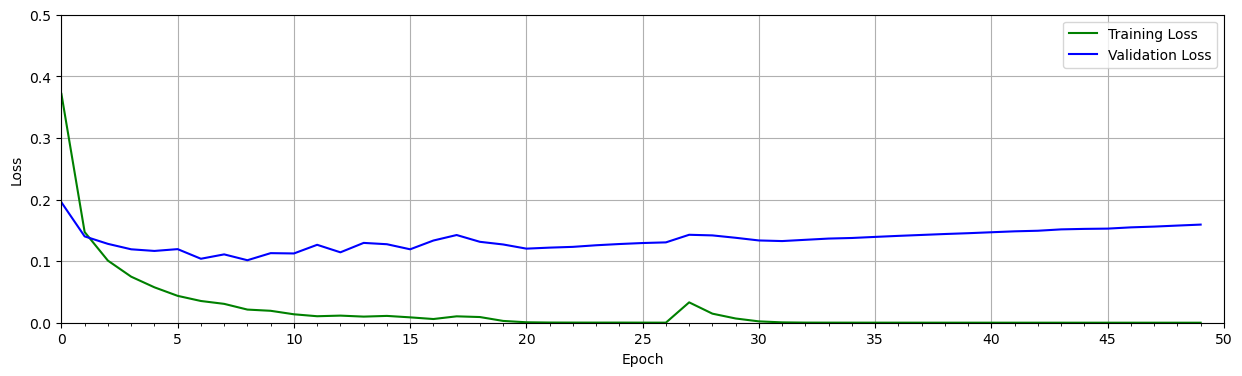

In [23]:
plot_results([train_loss, valid_loss],        
            ylabel="Loss", 
            ylim = [0.0, 0.5],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

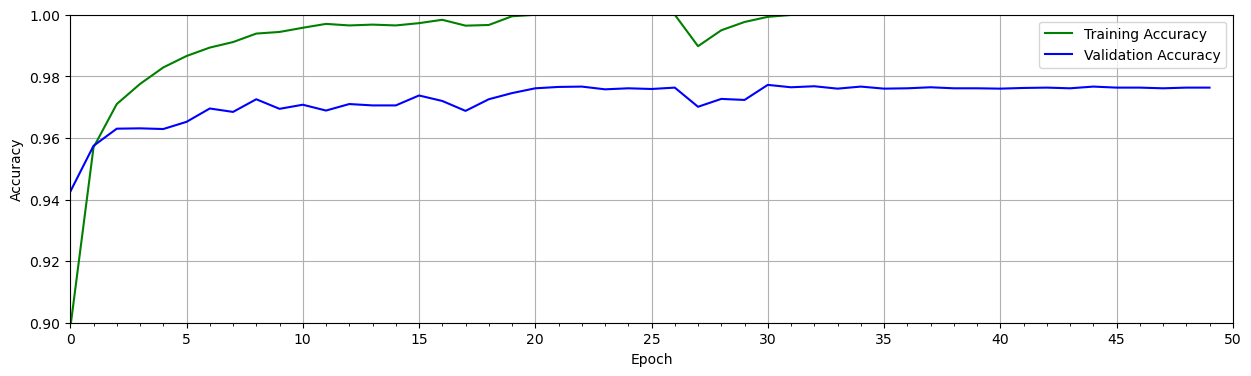

In [24]:
plot_results([train_acc, valid_acc], 
            ylabel="Accuracy",
            ylim = [0.9, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"]);